In [2]:
# - import basic library using to analyst

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
# - loading cleaning data

data = pd.read_csv('.\\data\\cleaning_data.csv')
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,ResolutionType,Touchscreen,IPS,CpuSpeed,CpuMark,MemoryGB,MemoryKind,Price
1008,Dell,Notebook,15.6,1920x1080,8.0,Intel HD Graphics 520,Windows 7,2.09,Full HD,No,No,2.4,Intel,256.0,SSD,56633.9760
535,Lenovo,Notebook,15.6,1920x1080,8.0,Intel HD Graphics 620,Windows 10,1.99,Full HD,No,Yes,2.7,Intel,512.0,SSD,92121.1200
1077,HP,Notebook,15.6,1920x1080,4.0,AMD Radeon R4,Windows 10,2.10,Full HD,No,No,2.5,AMD,1024.0,HDD,21205.4400
373,Lenovo,Ultrabook,14.0,2560x1440,8.0,Intel HD Graphics 620,Windows 10,1.13,HD,No,Yes,2.7,Intel,512.0,SSD,121584.9600
383,HP,Ultrabook,15.6,1920x1080,4.0,AMD Radeon 520,Windows 10,1.91,Full HD,No,No,3.0,AMD,256.0,SSD,26586.7200
579,Lenovo,Notebook,17.3,1920x1080,4.0,Intel HD Graphics 520,No OS,2.80,Full HD,No,No,2.0,Intel,500.0,HDD,28185.1200
612,Asus,Ultrabook,14.0,1920x1080,16.0,Intel HD Graphics 620,Windows 10,11.10,Full HD,No,No,2.7,Intel,512.0,SSD,101232.0000
649,Toshiba,Notebook,15.6,1920x1080,8.0,Intel HD Graphics 620,Windows 10,2.00,Full HD,No,Yes,2.5,Intel,256.0,SSD,67026.2400
1203,HP,Notebook,15.6,1920x1080,4.0,Intel HD Graphics 520,Windows 10,2.10,Full HD,No,No,2.0,Intel,1024.0,HDD,25467.8400
888,HP,Notebook,15.6,1920x1080,8.0,Nvidia GeForce 930MX,Windows 10,2.04,Full HD,No,No,2.7,Intel,256.0,SSD,54291.7872


In [4]:
# Shape a table adn basic statistics for numeric data.

print(data.shape)
data.describe().T

(1270, 16)


,count,mean,std,min,25%,50%,75%,max
Inches,1270.0,15.131890,1.955256,10.1000,14.00,15.60,15.6000,35.60
Ram,1270.0,8.457480,5.566930,1.0000,4.00,8.00,8.0000,64.00
Weight,1270.0,2.077677,0.808377,0.0002,1.50,2.04,2.3200,11.10
CpuSpeed,1270.0,2.298598,0.507204,0.9000,2.00,2.50,2.7000,3.60
MemoryGB,1270.0,448.563780,366.822280,8.0000,256.00,256.00,512.0000,2048.00
Price,1270.0,59886.072669,37323.784300,9270.7200,31914.72,52054.56,79303.8168,324954.72


## Data visualization

We'll want to look at which features are actually related to 'Price' and haw is a distribution numeric features.

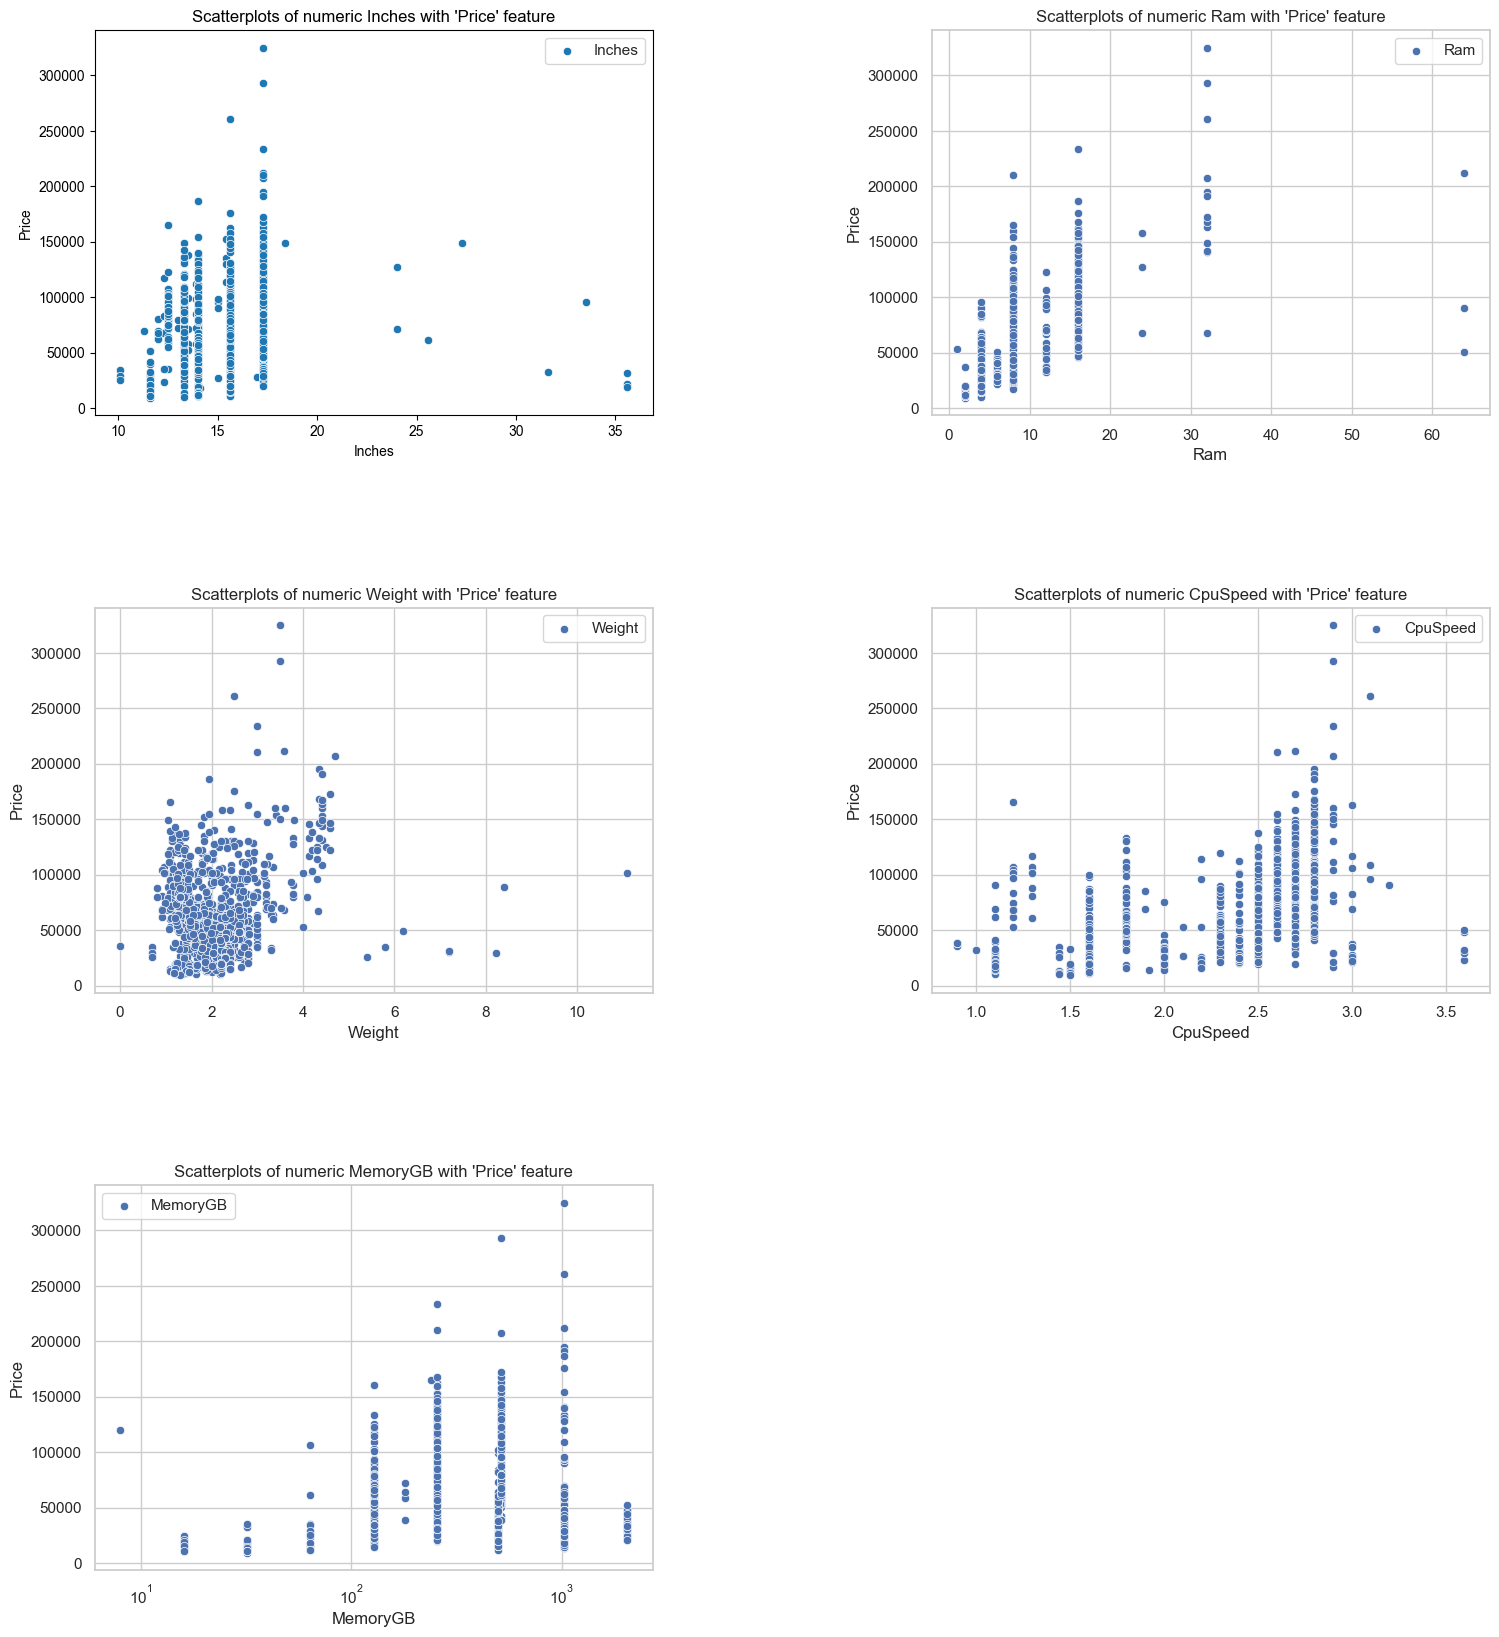

In [5]:
# Let's display scatterplots showing the relationship between numeric features and feature 'Price'

plt.figure(1, figsize=(18,20))
n=0
for cols in ['Inches', 'Ram', 'Weight', 'CpuSpeed', 'MemoryGB']:
    n+=1 
    plt.subplot(3, 2, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    if cols == 'MemoryGB':
        plt.xscale('log')
    sns.scatterplot(x=cols, y='Price', data=data, label=cols)
    plt.ylabel('Price')
    plt.title(f"Scatterplots of numeric {cols} with 'Price' feature")
plt.show()

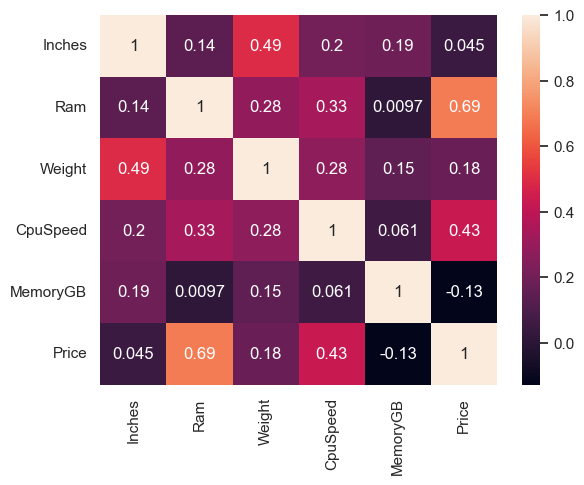

In [6]:
# We see that the rare variable is not clearly correlated with the 'Price' predicted variable. 
# On the other hand, there are also noticeable tendencies of increase in the value of the 'Price' variable along with increases in the describing variables. 
# Two variables that we can potentially exclude from the model are 'Inches' and 'Weight'.

# Let's see the Pearson correlation matrix between numeric variables.

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data[['Inches', 'Ram', 'Weight', 'CpuSpeed', 'MemoryGB', 'Price']].corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [7]:
# We see two important things:
# - there is a significant correlation between the 'Ram' and 'Price' variables
# - the correlation of the 'Inches', 'Weight' and 'Memory_GB' variables with the 'Price' variable is less than 0.2. 
# These are the variables we will potentially exclude from the model.

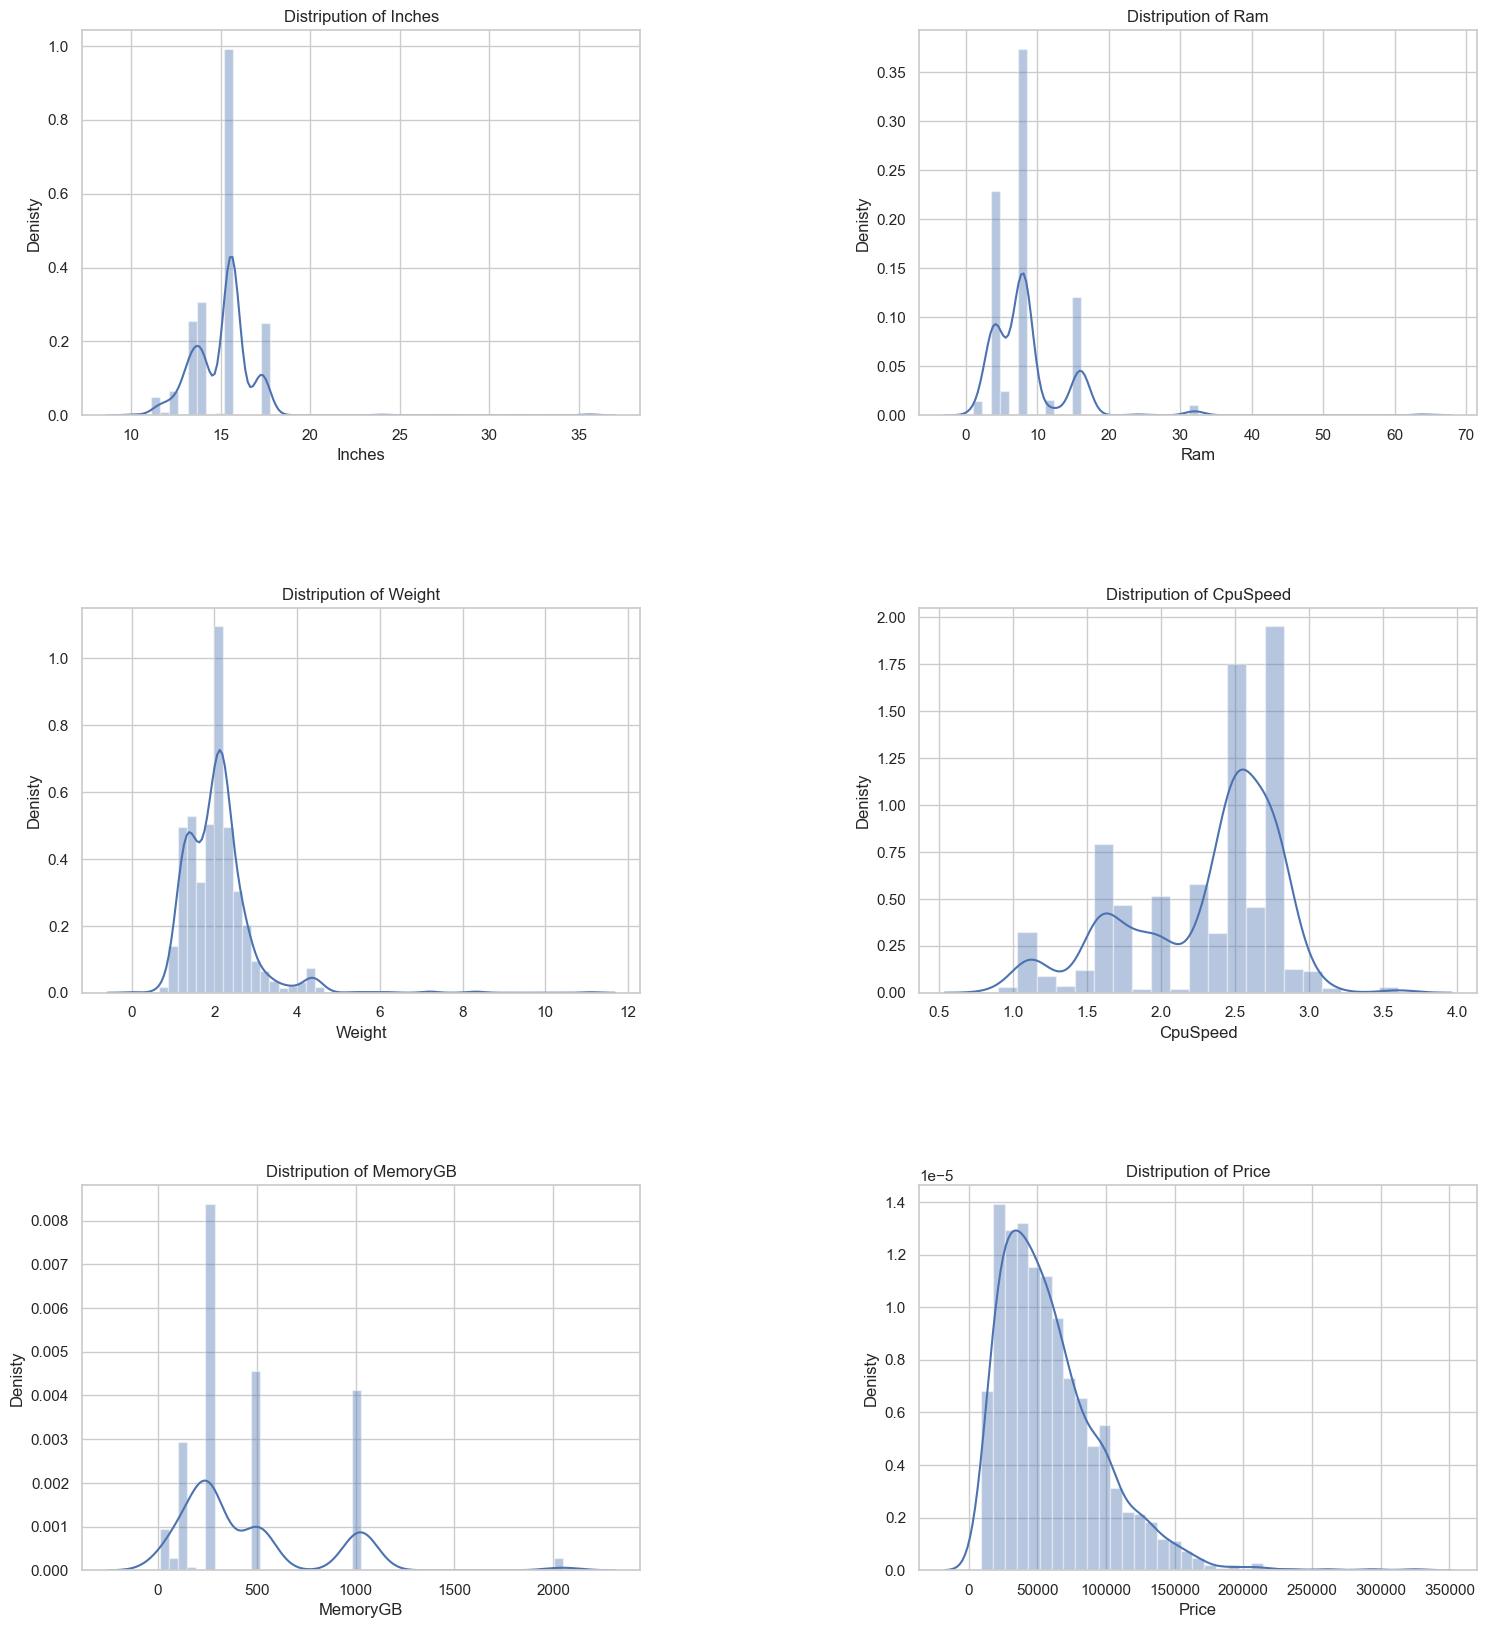

In [8]:
# Let's see the histograms for numeric variables along with the estimated distribution density line.

plt.figure(1, figsize=(18,20))
n=0
for cols in ['Inches', 'Ram', 'Weight', 'CpuSpeed', 'MemoryGB', 'Price']:
    n+=1 
    plt.subplot(3, 2, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(data[cols])
    plt.ylabel('Denisty')
    plt.title(f"Distripution of {cols}")
plt.show()

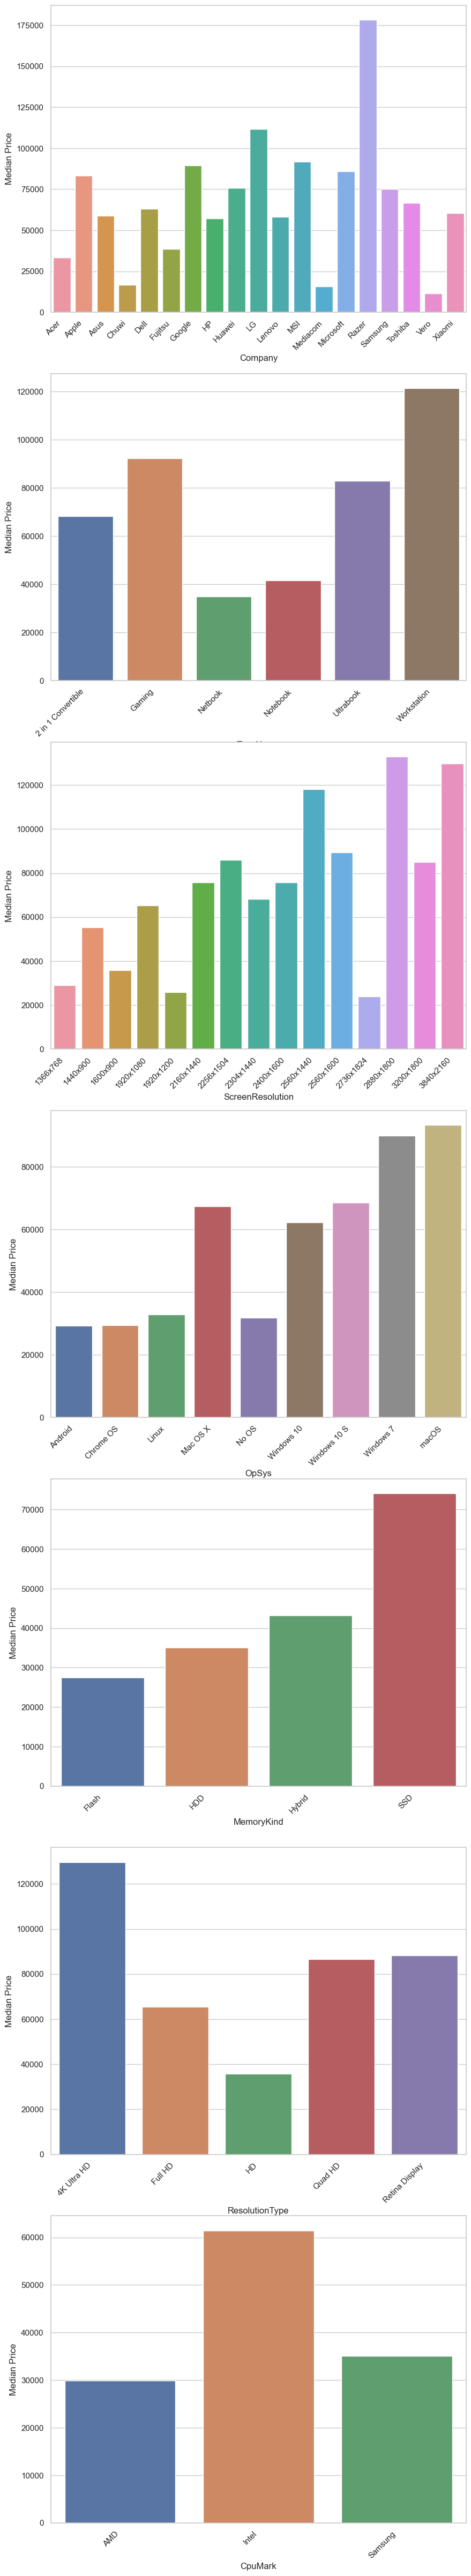

In [9]:
# Now let's look at the bar plots for categorical data, which will show how the median price in each class looks like. 
# We will use the median because 'Price' is not normally distributed and the mean could be misleading.
# We won't use feature 'Gpu', becouse it has too many classes and plot will be unredable.

plt.figure(1, figsize=(10,70))
categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'OpSys', 'MemoryKind', 'ResolutionType', 'CpuMark']
n=0
for col in categorical_features:
    n += 1
    plt.subplot(8, 1, n)
    df_grouped = data.groupby(col)['Price'].mean().reset_index()
    sns.barplot(x=col, y="Price", data=df_grouped)
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Median Price")
plt.show()

In [10]:
# Note that for each categorical features there is some price differentiation in its classes, 
# which indicates that they may be important in the model.

# We will build two models:
# - Linear Regression
# - Random Forest Regression
# We will adopt the strategy of first using all the features to build the models, 
# and then we will remove the featuress that we suspect have no effect on the 'Price' variable. 
# Then we will compare the results and assess the usefulness of the model.
# For codding categorical features we will use class OneHotEncoder from Scik-learn library.


# Now we want remowe outliers from dataset:

numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight']

for column in numeric_features:
    lower_bound = data[column].quantile(0.01)
    upper_bound = data[column].quantile(0.99)
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [11]:
# Requirements import and common things

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def transformer_setting(categorical_features, numeric_features):
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    numeric_transformer = RobustScaler()
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features),
            ('num', numeric_transformer, numeric_features)
        ])
    return preprocessor

## Linear regression model

We'll use all the variables.

Model score on train dataset: 0.86
Model score on test dataset: 0.80
Mean Square Error (MSE): 240866410.91
Mean Absolute Error (MAE): 11027.61


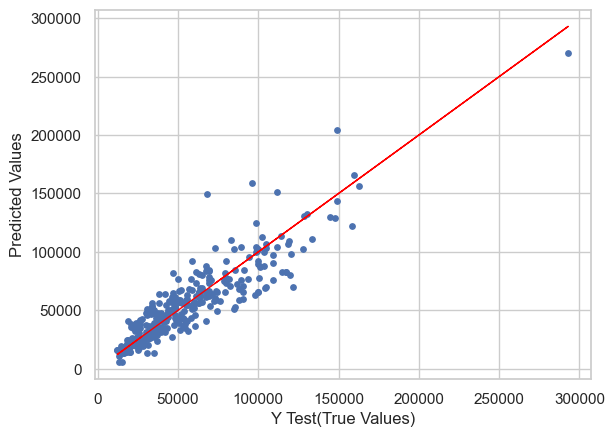

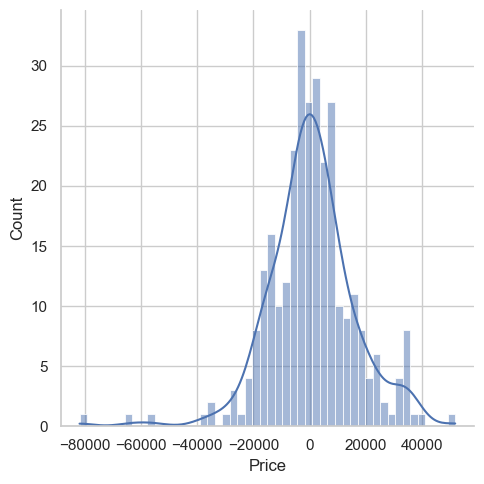

In [12]:
column_names = ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Weight', 'Ram', 'Gpu', 
                'OpSys', 'CpuSpeed', 'CpuMark', 'MemoryGB', 'MemoryKind', 'ResolutionType', 
                'Touchscreen', 'IPS']

X = data[column_names]
y = data['Price']

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys', 'MemoryKind', 
                        'CpuMark', 'Gpu', 'Touchscreen', 'IPS']
numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight']

preprocessor = transformer_setting(categorical_features, numeric_features)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model_1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model_1.fit(X_train, y_train)


print(f'Model score on train dataset: {model_1.score(X_train, y_train):.2f}')
print(f'Model score on test dataset: {model_1.score(X_test, y_test):.2f}')
predictions = model_1.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Square Error (MSE): {mse:.2f}')
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

plt.scatter(y_test, predictions, s=15)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.plot(y_test, y_test, color='red', lw=1)
plt.show()

sns.displot((y_test-predictions),kde=True, bins=50);

### Evaluation

We see that our model explains 86% of the cases in the training set and 80% of the cases in the test set. So our model is not overfitting, but the result is not ideal.

In the scatterplot of the actual price and the predicted price, we see that the model predicted the price well in most cases, except for a few outliers.

The residuals of the model, which were created as a result of subtracting the value of the predicted price from the actual price, have a normal distribution, which is illustrated by the residual density plot.

In [13]:
# We will use the RFECV feature selection method to find the optimal linear regression model.

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


column_names = ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Weight', 'Ram', 'Gpu', 
                'OpSys', 'CpuSpeed', 'CpuMark', 'MemoryGB', 'MemoryKind', 'ResolutionType', 
                'Touchscreen', 'IPS']

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys', 'MemoryKind', 
                        'CpuMark', 'Gpu', 'Touchscreen', 'IPS']
numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight']

scaler = StandardScaler()
encoder = LabelEncoder()

X_cat = data[categorical_features].reset_index(drop=True)

for column in X_cat.columns:
    X_cat[column] = encoder.fit_transform(X_cat[column])

X_num = pd.DataFrame(scaler.fit_transform(data[numeric_features]), columns=numeric_features).reset_index(drop=True)

X = pd.concat([X_cat, X_num], axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model = LinearRegression()
                         
rfecv = RFECV(estimator=model)

rfecv.fit(X_train, y_train)
                         
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Choceen features: {X.columns[rfecv.support_]}")                        
print("Features rank:", rfecv.ranking_)


Optimal number of features: 15
Choceen features: Index(['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys',
       'MemoryKind', 'CpuMark', 'Gpu', 'Touchscreen', 'IPS', 'Ram', 'CpuSpeed',
       'MemoryGB', 'Inches', 'Weight'],
      dtype='object')
Features rank: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [14]:
from sklearn.feature_selection import SelectKBest, f_regression

column_names = ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Weight', 'Ram', 'Gpu', 
                'OpSys', 'CpuSpeed', 'CpuMark', 'MemoryGB', 'MemoryKind', 'ResolutionType', 
                'Touchscreen', 'IPS']

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys', 'MemoryKind', 
                        'CpuMark', 'Gpu', 'Touchscreen', 'IPS']
numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight']

scaler = StandardScaler()
encoder = LabelEncoder()

X_cat = data[categorical_features].reset_index(drop=True)

for column in X_cat.columns:
    X_cat[column] = encoder.fit_transform(X_cat[column])

X_num = pd.DataFrame(scaler.fit_transform(data[numeric_features]), columns=numeric_features).reset_index(drop=True)

X = pd.concat([X_cat, X_num], axis=1)
y = data['Price']

# Tworzenie obiektu SelectKBest i wybór K najlepszych cech
k_best = SelectKBest(score_func=f_regression, k=14)  # Wybierz 5 najlepszych cech
X_new = k_best.fit_transform(X, y)  # Zastosuj selekcję cech na danych

# Wyświetlanie wybranych cech
selected_features = k_best.get_support(indices=True)
selected_column_names = [column_names[i] for i in selected_features]
print("Wybrane cechy:", selected_column_names)


Wybrane cechy: ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Weight', 'Ram', 'Gpu', 'OpSys', 'CpuSpeed', 'CpuMark', 'MemoryGB', 'MemoryKind', 'ResolutionType', 'IPS']


In [15]:
# Linear Reression model with chosen features

column_names = ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Weight', 'Ram', 'Gpu', 'OpSys', 'CpuSpeed', 'CpuMark', 'MemoryGB', 'MemoryKind', 'ResolutionType', 'IPS']

categorical_features = ['OpSys', 'MemoryKind']
numeric_features = ['Ram', 'Inches', 'MemoryGB',]

X = data[column_names]
y = data['Price']

preprocessor = transformer_setting(categorical_features, numeric_features)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model_2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model_2.fit(X_train, y_train)

print(f'Model score on train dataset: {model_2.score(X_train, y_train):.2f}')
print(f'Model score on test dataset: {model_2.score(X_test, y_test):.2f}')
predictions = model_2.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Square Error (MSE): {mse:.2f}')
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae:.2f}')



Model score on train dataset: 0.65
Model score on test dataset: 0.61
Mean Square Error (MSE): 470759535.10
Mean Absolute Error (MAE): 15319.82


In [16]:
# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# import statsmodels.api as sm


# column_names = ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Weight', 'Ram', 'Gpu', 'OpSys', 'CpuSpeed', 'CpuMark', 'MemoryGB', 'MemoryKind', 'ResolutionType']

# categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys', 'MemoryKind', 'CpuMark', 'Gpu']
# numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight']

# scaler = StandardScaler()

# X_cat = pd.get_dummies(data[categorical_features], columns=categorical_features)

# X_num = pd.DataFrame(scaler.fit_transform(data[numeric_features]), columns=numeric_features)

# X = pd.concat([X_cat, X_num], axis=1)
# y = data['Price']

# X = sm.add_constant(X)

# model = sm.OLS(y, X)

# # Dopasowanie modelu do danych
# results = model.fit()

# # Wyświetlenie wyników
# print(results.summary())                       



## Random Forest Regression Model

Model score on train dataset: 0.97
Model score on test dataset: 0.82
Mean Square Error (MSE): 213397761.80
Mean Absolute Error (MAE): 9159.36


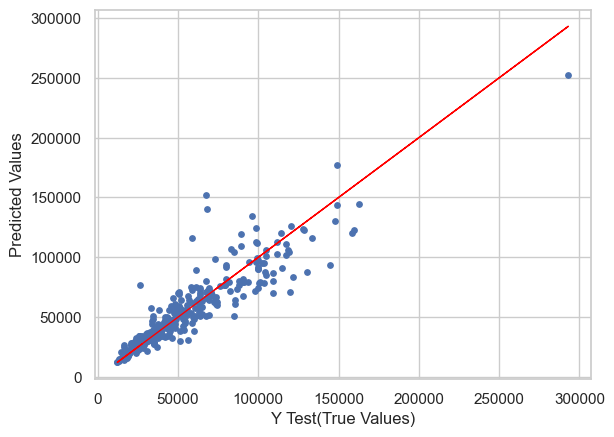

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

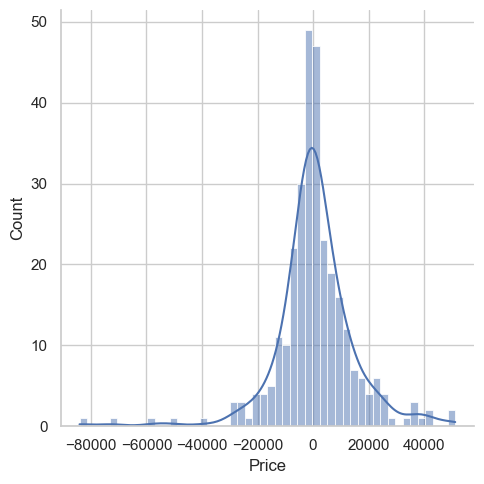

In [19]:
column_names = ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Weight', 'Ram', 'Gpu', 
                'OpSys', 'CpuSpeed', 'CpuMark', 'MemoryGB', 'MemoryKind', 'ResolutionType', 
                'Touchscreen', 'IPS']

X = data[column_names]
y = data['Price']

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys', 'MemoryKind', 
                        'CpuMark', 'Gpu', 'Touchscreen', 'IPS']
numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight']

preprocessor = transformer_setting(categorical_features, numeric_features)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model_2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

model_2.fit(X_train, y_train)


print(f'Model score on train dataset: {model_2.score(X_train, y_train):.2f}')
print(f'Model score on test dataset: {model_2.score(X_test, y_test):.2f}')
predictions = model_2.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Square Error (MSE): {mse:.2f}')
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

plt.scatter(y_test, predictions, s=15)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.plot(y_test, y_test, color='red', lw=1)
plt.show()

sns.displot((y_test-predictions),kde=True, bins=50);

importances = model_2.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(len(X.columns)):
    print(f"{i+1}. {X.columns[indices[i]]}: {importances[indices[i]]}")

Model score on train dataset: 0.95
Model score on test dataset: 0.81
Mean Square Error (MSE): 229375838.61
Mean Absolute Error (MAE): 9407.78


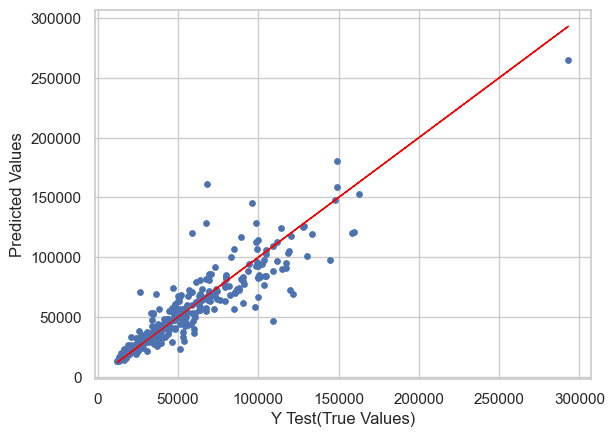

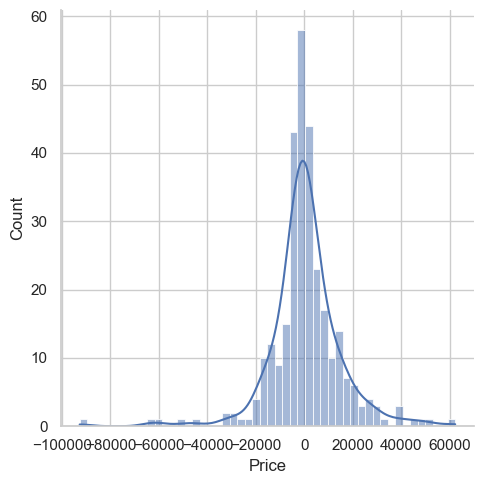

In [18]:
column_names = ['Company', 'TypeName', 'ScreenResolution', 'Ram', 'Gpu', 
                'OpSys', 'CpuSpeed', 'CpuMark', 'MemoryKind', 'ResolutionType', 
                'Touchscreen', 'IPS']

X = data[column_names]
y = data['Price']

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys', 'MemoryKind', 
                        'CpuMark', 'Gpu', 'Touchscreen', 'IPS']
numeric_features = ['Ram', 'CpuSpeed']

preprocessor = transformer_setting(categorical_features, numeric_features)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model_2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

model_2.fit(X_train, y_train)


print(f'Model score on train dataset: {model_2.score(X_train, y_train):.2f}')
print(f'Model score on test dataset: {model_2.score(X_test, y_test):.2f}')
predictions = model_2.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Square Error (MSE): {mse:.2f}')
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

plt.scatter(y_test, predictions, s=15)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.plot(y_test, y_test, color='red', lw=1)
plt.show()

sns.displot((y_test-predictions),kde=True, bins=50);